In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as splt
import seaborn

In [2]:
df=pd.read_csv('heart_failure.csv')

In [3]:
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
x= df.drop(['DEATH_EVENT'],axis=1)

In [6]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [7]:
y=df['DEATH_EVENT']

In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
Rclf =RandomForestClassifier(n_estimators=100,random_state=0)

In [12]:
Rclf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=0)

In [13]:
Rclf.score(xtest,ytest)

0.95

In [14]:
pred=Rclf.predict(xtest)

In [15]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
rf_acc=accuracy_score(ytest,pred)
print(rf_acc)

0.95


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred)

array([[45,  1],
       [ 2, 12]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        46
           1       0.92      0.86      0.89        14

    accuracy                           0.95        60
   macro avg       0.94      0.92      0.93        60
weighted avg       0.95      0.95      0.95        60



# SVM

In [20]:
from sklearn.svm import SVC
svm = SVC()

In [21]:
svm.fit(xtrain,ytrain)

SVC()

In [22]:
pred1=svm.predict(xtest)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred1)

0.7666666666666667

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred1)

array([[46,  0],
       [14,  0]], dtype=int64)

In [26]:
import warnings
from sklearn.metrics import classification_report
print(classification_report(ytest,pred1))
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    precision = precision_score(y_test, predictions, zero_division=0)
    recall = recall_score(y_test, predictions, zero_division=0)
    f1 = f1_score(y_test, predictions, zero_division=0)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60



D:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'UndefinedMetricWarning' is not defined

# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 17, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [27]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=17)

In [28]:
pred2=knn.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred2)

D:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7333333333333333

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred2)

array([[44,  2],
       [14,  0]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        46
           1       0.00      0.00      0.00        14

    accuracy                           0.73        60
   macro avg       0.38      0.48      0.42        60
weighted avg       0.58      0.73      0.65        60



# Naive Bayes Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(xtrain,ytrain)
GNB.score(xtest,ytest)


0.9333333333333333

In [32]:
pred3=GNB.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred3)

0.9333333333333333

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred3)

array([[45,  1],
       [ 3, 11]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred3))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.92      0.79      0.85        14

    accuracy                           0.93        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.93      0.93      0.93        60



In [35]:
from sklearn.naive_bayes import BernoulliNB
BNG=BernoulliNB()
BNG.fit(xtrain,ytrain)
BNG.score(xtest,ytest)

0.7666666666666667

In [36]:
from sklearn.naive_bayes import MultinomialNB
MNB= MultinomialNB()
MNB.fit(xtrain,ytrain)
MNB.score(xtest,ytest)

0.6166666666666667

# LogisticRegression

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs', max_iter=1000)


In [38]:
lr.fit(xtrain,ytrain)
pred4=lr.predict(xtest)


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred4)

0.8666666666666667

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred4)

array([[42,  4],
       [ 4, 10]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred4))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        46
           1       0.71      0.71      0.71        14

    accuracy                           0.87        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.87      0.87      0.87        60



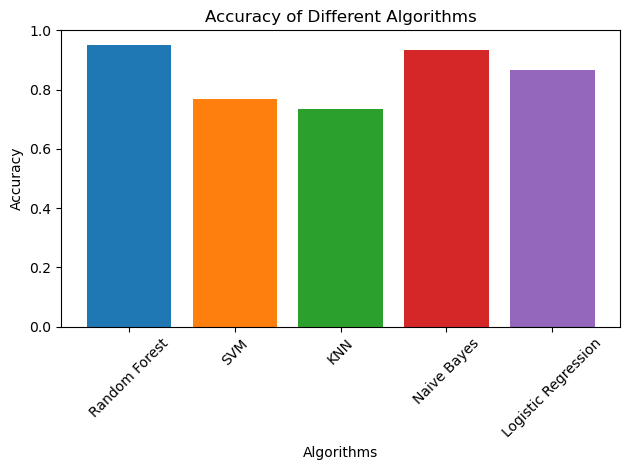

In [53]:


import numpy as np
import random

algorithms = ['Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Logistic Regression']
accuracy = [0.95, 0.7666666666666667, 0.7333333333333333,0.9333333333333333 ,0.8666666666666667]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
splt.bar(algorithms, accuracy, color=colors)
splt.ylim(0,1)
splt.xlabel('Algorithms')
splt.ylabel('Accuracy')
splt.title('Accuracy of Different Algorithms')
splt.xticks(rotation=45)
splt.tight_layout()
splt.show()